This notebook is adapted from the "how-to-use-scivision" notebook in the repository https://github.com/scivision-gallery/scivision_examples to be used in the Turing REG/RDS Connections Workshop.
The purpose is to use the flowers dataset and pretrained model that will have been added to the Scivision catalog.

In [1]:
from scivision import default_catalog, load_pretrained_model

Construct a dataframe containing the contents of the models catalog:

In [2]:
models_catalog = default_catalog.models.to_dataframe()
models_catalog

,name,description,tasks,url,pkg_url,format,pretrained,labels_required,institution,tags
0,model-000,None,"(TaskEnum.object_detection, TaskEnum.segmentat...",https://github.com/stardist/stardist,git+https://github.com/stardist/stardist.git@main,image,True,True,"(epfl,)","(2D, 3D, optical-microscopy, xray, microtomogr..."
1,model-001,None,"(TaskEnum.segmentation, TaskEnum.thresholding,...",https://github.com/danforthcenter/plantcv,git+https://github.com/danforthcenter/plantcv@...,image,True,True,"(danforthcenter,)","(2D, hyperspectral, multispectral, near-infrar..."
2,model-002,None,"(TaskEnum.segmentation,)",https://github.com/MarniTausen/Greenotyper,git+https://github.com/MarniTausen/Greenotyper...,image,True,True,"(MarniTausen,)","(2D, multispectral, plant-phenotyping, climate..."
3,model-003,None,"(TaskEnum.segmentation,)",https://github.com/alan-turing-institute/cv-al...,git+https://github.com/alan-turing-institute/c...,image,True,True,"(alan-turing-institute,)","(dummy,)"
4,scivision-test-plugin,None,"(TaskEnum.object_detection,)",https://github.com/alan-turing-institute/scivi...,git+https://github.com/alan-turing-institute/s...,image,True,False,"(alan-turing-institute,)","(dummy,)"
5,mapreader-plant,automated detection of plant patches in images...,"(TaskEnum.classificiation, TaskEnum.object_det...",https://github.com/alan-turing-institute/mapre...,git+https://github.com/alan-turing-institute/m...,image,True,False,"(alan-turing-institute,)","(2D, plant, phenotype, rgb, biology, agriculture)"
6,resnet50-plantkton,automated classification of plankton images co...,"(TaskEnum.classificiation,)",https://github.com/alan-turing-institute/plank...,git+https://github.com/alan-turing-institute/p...,image,True,False,"(alan-turing-institute, cefas, plankton-analyt...","(2D, plankton, ecology, environmental-science)"
7,vedge-detector,automated detection of coastal vegetation edge...,"(TaskEnum.segmentation,)",https://github.com/MartinSJRogers/VEdge_Detect...,git+https://github.com/MartinSJRogers/VEdge_De...,image,True,False,"(cambridge-university, birkbeck-university)","(2D, satellite, remote-sensing, ecology, envir..."
8,image-classifiers,None,"(TaskEnum.classificiation,)",https://github.com/alan-turing-institute/scivi...,git+https://github.com/alan-turing-institute/s...,image,True,False,"(alan-turing-institute,)","(classification, 2D, image)"
9,huggingface-classifiers,None,"(TaskEnum.classificiation,)",https://github.com/alan-turing-institute/scivi...,git+https://github.com/alan-turing-institute/s...,image,True,False,"(alan-turing-institute, huggingface)","(classification, 2D, image)"


Our newly-added "flower-species" model is there as the last entry.  We can use the "url" column, specifying the Github repo that contains the model, to load the model itself: 

In [3]:
model_repo = models_catalog[models_catalog.name == "flower-classification-model"].url.item()

In [4]:
model = load_pretrained_model(model_repo, allow_install=True)

2022-11-10 11:09:17.589535: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Now we will search the catalog again for data sources that are compatible with our model.   By "compatible", we mean that the dataset is suitable for the "tasks" that the model can perform.

In [5]:
default_catalog.datasources.to_dataframe()

,name,description,tasks,labels_provided,domains,url,format,institution,tags
0,data-000,None,"(TaskEnum.object_detection, TaskEnum.segmentat...",True,"(optical-microscopy,)",https://github.com/stardist/stardist/releases/...,image,"(epfl,)","(help-needed, 3D, cell, cell-counting, biology..."
1,data-001,None,"(TaskEnum.thresholding, TaskEnum.segmentation,...",True,"(multispectral, hyperspectral)",https://gitlab.au.dk/AUENG-Vision/OPPD/-/archi...,image,"(Aarhus University,)","(help-needed, 2D, plant-phenotyping, agricultu..."
2,data-002,None,(TaskEnum.classificiation),True,"(oceanography,)",https://github.com/scotthosking/intake-plankto...,image,"(CEFAS,)","(help-needed, 2D)"
3,data-003,Koala,"(TaskEnum.object_detection, TaskEnum.classific...",True,"(computer-vision,)",https://github.com/alan-turing-institute/scivi...,image,"(Wikipedia by Erik Veland,)","(demo,)"
4,data-004,Sample dataset of Plankton required to demonst...,(TaskEnum.classificiation),True,"(computer-vision,)",https://raw.githubusercontent.com/alan-turing-...,image,"(Centre for Environment, Fisheries and Aquacul...","(2D, plankton, ecology, environmental-science)"
5,data-005,Sample dataset of satellite imagery required t...,"(TaskEnum.segmentation, TaskEnum.classificiation)",False,"(computer-vision, earth-observation, ecology)",https://github.com/MartinSJRogers/VEdge_Detect...,image,"(Cambridge University,)","(2D, satellite, remote-sensing, ecology, envir..."
6,data-006,Sample dataset of drone RGB imagery required t...,"(TaskEnum.object_detection, TaskEnum.segmentat...",False,"(computer-vision, earth-observation, ecology)",https://github.com/shmh40/detectreeRGB-treecro...,image,"(Cambridge University,)","(2D, drone, satellite, aerial, remote-sensing,..."
7,scivision_sentinel2_stac,Data plugin for accessing Sentinel-2 Cloud-Opt...,"(TaskEnum.segmentation, TaskEnum.classificiation)",False,"(computer-vision, earth-observation, ecology)",https://github.com/alan-turing-institute/scivi...,image,"(The Alan Turing Institute,)","(satellite, aerial, remote-sensing, ecology, e..."
8,flowers,"The 102 flowers dataset, created by Visual Geo...",(TaskEnum.classificiation),True,"(computer-vision, ecology)",https://github.com/nbarlowATI/flowers_data_repo,image,"(The Alan Turing Institute,)","(ecology, environmental-science)"


In [6]:
compatible_datasources = default_catalog.compatible_datasources("flower-classification-model").to_dataframe()
compatible_datasources

,name,description,tasks,labels_provided,domains,url,format,institution,tags
2,data-002,None,(TaskEnum.classificiation),True,"(oceanography,)",https://github.com/scotthosking/intake-plankto...,image,"(CEFAS,)","(help-needed, 2D)"
3,data-003,Koala,"(TaskEnum.object_detection, TaskEnum.classific...",True,"(computer-vision,)",https://github.com/alan-turing-institute/scivi...,image,"(Wikipedia by Erik Veland,)","(demo,)"
4,data-004,Sample dataset of Plankton required to demonst...,(TaskEnum.classificiation),True,"(computer-vision,)",https://raw.githubusercontent.com/alan-turing-...,image,"(Centre for Environment, Fisheries and Aquacul...","(2D, plankton, ecology, environmental-science)"
8,flowers,"The 102 flowers dataset, created by Visual Geo...",(TaskEnum.classificiation),True,"(computer-vision, ecology)",https://github.com/nbarlowATI/flowers_data_repo,image,"(The Alan Turing Institute,)","(ecology, environmental-science)"


Happily, our newly-added flowers dataset is there.  We can use the "url" column to load the dataset:

In [7]:
target_datasource = compatible_datasources.loc[compatible_datasources['name'] == 'flowers']
data_url = target_datasource['url'].item()

In [8]:
from scivision import load_dataset
data_config = load_dataset(data_url)
data_config

data:
  args:
    path: https://raw.githubusercontent.com/nbarlowATI/flowers_data_repo/main/.scivision/data.yml
  description: ''
  driver: intake.catalog.local.YAMLFileCatalog
  metadata: {}


Now, using Intake and Dask, we get the images themselves in a form that we can iterate over.

In [9]:
images = data_config.flowers().to_dask()

We can take a look at an example image using matplotlib's imshow function:

In [10]:
import matplotlib.pyplot as plt

And finally, we can run our model on this image, to see what category it predicts for it:

1/1 [==============================] - 2s 2s/step


'passion flower: 98.91%'

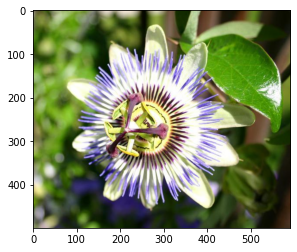

In [11]:
plt.imshow(images[0])
model.predict(images[0])

1/1 [==============================] - 1s 1s/step


"colt's foot: 98.37%"

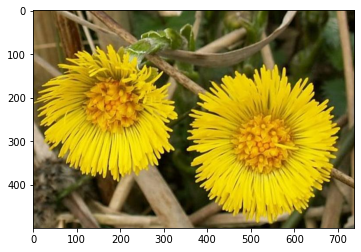

In [12]:
plt.imshow(images[4000])
model.predict(images[4000])